In [114]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium

pd.options.display.max_columns = 25


In [64]:
provincias = gpd.read_file('lineas_limite.zip!SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89')
#INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'
provincias = provincias.to_crs("+proj=cea EPSG:2062")
provincias['area'] = round(provincias.area/1000000,0)

#Mapa de coropletas: mapa temÃ¡tico con las Ã¡reas sombreadas de diferentes colores en funciÃ³n del valor de una columna
provincias = provincias.to_crs(crs=3395)
#LÃ­mites de las provincias


In [115]:
trenes = gpd.read_file('RT_VALENCIA.zip!RT_VALENCIA/RT_FFCC/rt_estacionffcc_p.shp')
trenes = trenes.to_crs("+proj=cea EPSG:4326")

trenes = trenes.to_crs(crs=3395)

In [118]:
tramos = gpd.read_file('RT_VALENCIA.zip!RT_VALENCIA/RT_FFCC/rt_tramofc_linea.shp')
tramos = tramos.to_crs("+proj=cea EPSG:4326")

tramos = tramos.to_crs(crs=3395)

In [123]:
tramos["tipotramoD"].unique()

array(['Troncal', 'Playa de vías', 'No aplicable'], dtype=object)

<Axes: >

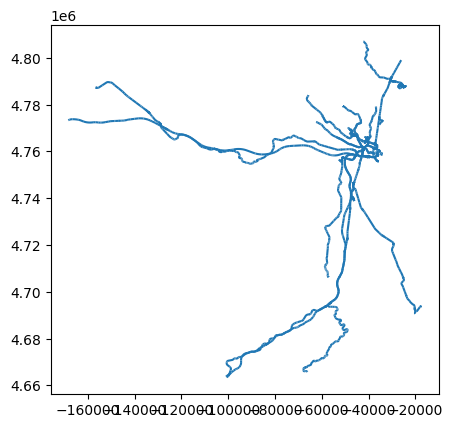

In [120]:
tramos.plot()

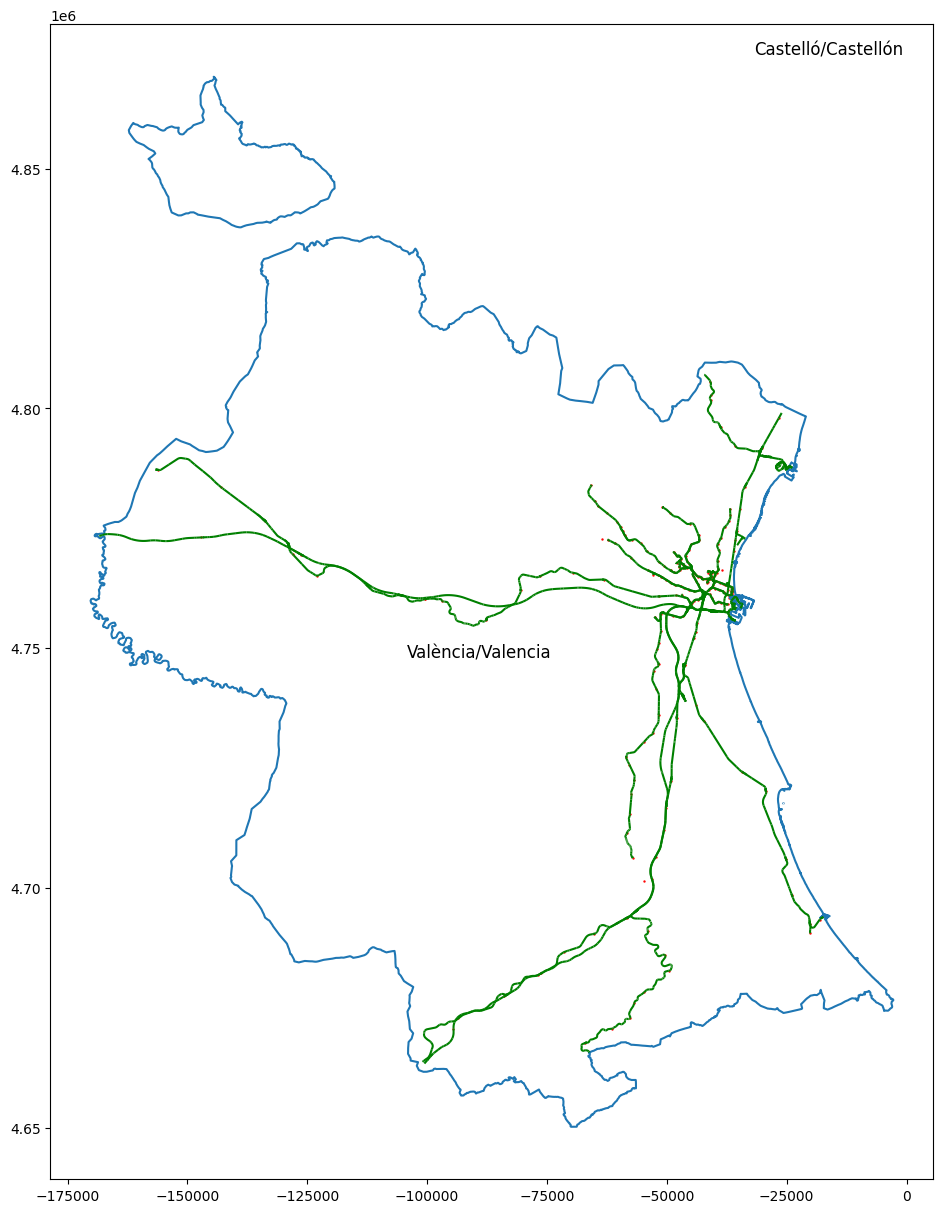

In [124]:
ax = provincias[provincias["NAMEUNIT"] == "València/Valencia"].boundary.plot(figsize=(15, 15))
provincias.apply(lambda x: ax.annotate(text=x.NAMEUNIT,
    xy=x.geometry.centroid.coords[0], ha='center',
    fontsize=12) if 'Territorio' not in x.NAMEUNIT
    else ax.annotate(text='',
    xy=x.geometry.centroid.coords[0], ha='center',
    fontsize=12),axis=1)
trenes.plot(ax=ax, color='red', markersize=0.5)
tramos.plot(ax=ax, color='green', markersize=0.5)
plt.show()

<Axes: >

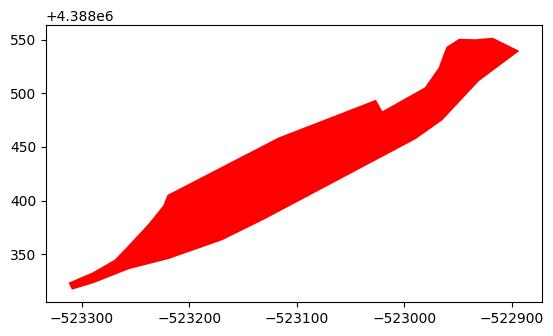

In [89]:
trenes[3:4].plot(color='red', markersize=0.5)

In [55]:
provincias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_tramoc   301 non-null    float64 
 1   id_cable    301 non-null    float64 
 2   nombre      301 non-null    object  
 3   tipo_cable  301 non-null    int64   
 4   tipo_cablD  301 non-null    object  
 5   fuente      301 non-null    int64   
 6   fuenteD     301 non-null    object  
 7   fecha_alta  301 non-null    object  
 8   geometry    301 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 21.3+ KB


In [56]:
provincias[-1:]

,id_tramoc,id_cable,nombre,tipo_cable,tipo_cablD,fuente,fuenteD,fecha_alta,geometry
300,2.400000e+11,2.400000e+11,Debutantes Saelencias,3,Telesquí,1,Instituto Geográfico Nacional,2021-04-06,"LINESTRING Z (-598931.498 5292459.715 0.000, -..."


<Axes: >

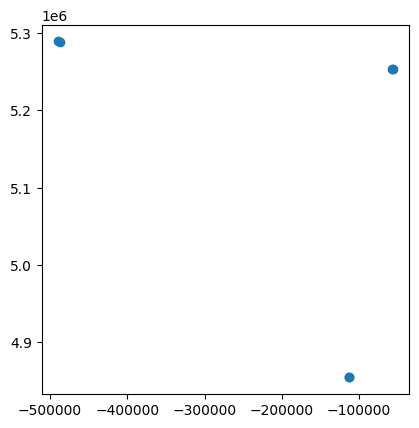

In [61]:
provincias[:3].boundary.plot()